# 4. Logistic Regression


## 4.1 The Logistic Regression model
The logistic regression model has a linear form for the logit of the success probability
- logit link function 

$$
logit(\pi(x)) = \log \frac{\pi(x)}{1 - \pi(x)} = \alpha + \beta^T X 
$$

where 
- $\pi(x)$ is the probability of 'success'
- $X$ is a $n \times m$ matrix with $n$ observations for $m$ explanatory variables 

Consider a single explanatory variable $x$ (column of $X$) and its corresponding 'effect parameter' $\beta$
$$
\pi(x) = \frac{e^{\alpha + \beta x}}{1 + e^{\alpha + \beta x}}
$$

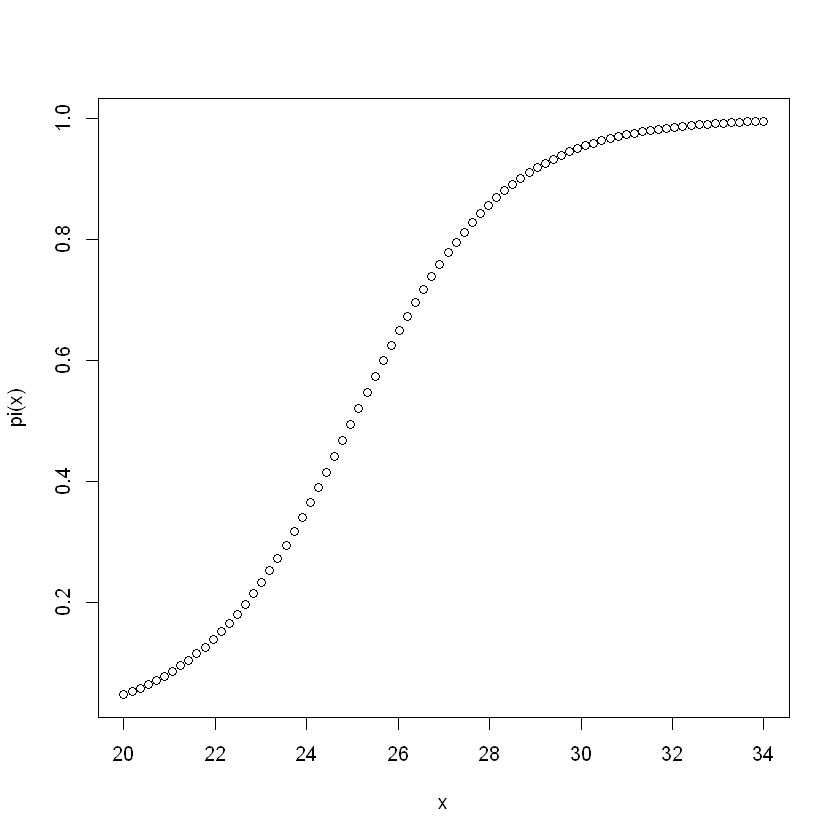

In [22]:
single_pix <- function(x, a, b) {
    y <- exp(a+b*x)
    return(y/(1+y))
}

x <- seq(20, 34, length.out=80)
y <- lapply(x, single_pix, a=-15, b=0.6)
plot(x, y, type="p", ylab="pi(x)")

In [3]:
library(RColorBrewer)

Crabs <- read.table("http://users.stat.ufl.edu/~aa/cat/data/Crabs.dat",
  header = TRUE
)

colors <- brewer.pal(n = 4, name = "Dark2")
head(Crabs)

,crab,sat,y,weight,width,color,spine
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,8,1,3.05,28.3,2,3
2,2,0,0,1.55,22.5,3,3
3,3,9,1,2.30,26.0,1,1
4,4,0,0,2.10,24.8,3,3
5,5,4,1,2.60,26.0,3,3
6,6,0,0,2.10,23.8,2,3


In [5]:
summary(Crabs)

      crab          sat               y              weight          width     
 Min.   :  1   Min.   : 0.000   Min.   :0.0000   Min.   :1.200   Min.   :21.0  
 1st Qu.: 44   1st Qu.: 0.000   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:24.9  
 Median : 87   Median : 2.000   Median :1.0000   Median :2.350   Median :26.1  
 Mean   : 87   Mean   : 2.919   Mean   :0.6416   Mean   :2.437   Mean   :26.3  
 3rd Qu.:130   3rd Qu.: 5.000   3rd Qu.:1.0000   3rd Qu.:2.850   3rd Qu.:27.7  
 Max.   :173   Max.   :15.000   Max.   :1.0000   Max.   :5.200   Max.   :33.5  
     color           spine      
 Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000  
 Median :2.000   Median :3.000  
 Mean   :2.439   Mean   :2.486  
 3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :3.000  

We let $y=1$ if a female crab has at least one satellite (`sat`) and $y=0$ otherwise. 
We use the column `width`, a continuous variable, as the only explanatory variable. 
- `width` $\in [21, 33.5]$ 
- `sat` $\in [0, 15]$ 

In [19]:
library(gam, help, pos = 2, lib.loc = NULL)
gam.fit <- gam(y ~ s(width), family=binomial, data=Crabs) # s indicates a 'smooth function'
fit <- glm(y ~ width, family=binomial, data=Crabs)

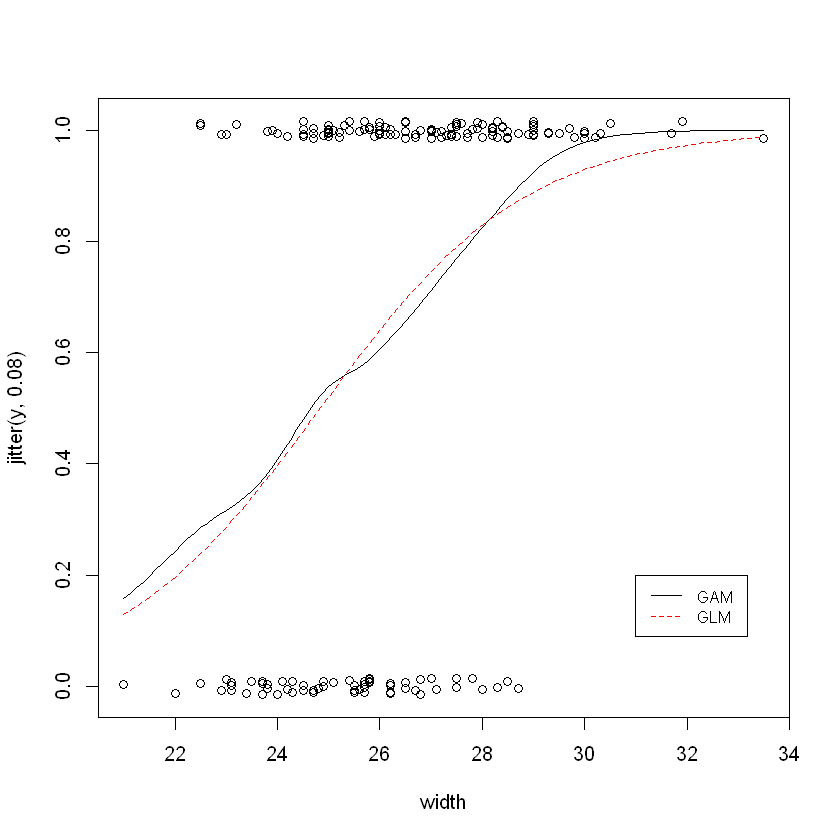

In [18]:
# jitter(x, f) adds noise f to vector x 
plot(jitter(y, 0.08) ~ width, data=Crabs)

# curve(func, from, to)
# Draws a curve corresponding to a function over the interval [from, to]
y1 = curve(
    predict(
        gam.fit, data.frame(width=x), type="resp"
    ), add=TRUE # add to existing plot 
)

y2 = curve(
    predict(
        fit, data.frame(width=x), type="resp"
    ), col="red", add=TRUE, lty="dashed"
)

legend(
    31, 0.2, 
    legend=c("GAM", "GLM"), 
    col=c("black", "red"), 
    lty=c(1,2), 
    cex=0.8
)

In [20]:
summary(fit)


Call:
glm(formula = y ~ width, family = binomial, data = Crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0281  -1.0458   0.5480   0.9066   1.6942  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.3508     2.6287  -4.698 2.62e-06 ***
width         0.4972     0.1017   4.887 1.02e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 194.45  on 171  degrees of freedom
AIC: 198.45

Number of Fisher Scoring iterations: 4


The probability that a crab of width $x$ has a satellite is given by the logistic fit:
$$
logit(\pi(x)) = -12.351 + 0.497x
$$

For every 1cm increase in width $x$, we get a $\exp(0.497) = 1.64$ times increase in the probability of a satellite. 

Applying `single_pix`, we get $\pi(x) = 0.128$ as the probability that a 21cm-wide crab has a satellite.

The incremental rate of change in probability at a given point is 
$$
\begin{align}
\ln \frac{\pi(x)}{1 - \pi(x)} &= \alpha + \beta x \\
\ln \pi(x) &= \alpha + \beta x + \ln(1-\pi(x)) \\
\frac{\partial}{\partial x} \ln \pi(x) &= \beta - \frac{\pi'(x)}{1 - \pi(x)} \\
\pi'(x) \left(\frac{1}{\pi(x)} + \frac{1}{1-\pi(x)} \right) 
    &= \beta \\
\pi'(x) &= \beta \left( \frac{1 - \pi(x) + \pi(x) }{\pi(x) (1 - \pi(x))} \right)^{-1} \\
    &= \beta \pi(x) (1 - \pi(x))
\end{align}
$$
At 21cm, $\pi'(x) = 0.497(0.128)(1-0.128) = 0.055$. 

The median effective level is the value of $x$ for which $\pi(x) = 1/2$. Thus,
$$
\ln(1/2) = \alpha + \beta x + \ln(1/2) \implies 
x = -\alpha/\beta 
$$
which gives $x_{median} = -(-12.351/0.497) = 24.8$. 

In [23]:
single_pix(21, -12.351, 0.497)

[1] 0.1285321